In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
# !pip3 install piskle
# !pip3 install delayed
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from copy import deepcopy

In [31]:
## Read and format data
heart = pd.read_csv("heart_2020_cleaned.csv")
# print(set(list(heart["GenHealth"])))
"""  # Balance the dataset (decreases accuracy significantly)
unhealthy = heart[heart["HeartDisease"] == "Yes"]
num_success = unhealthy.shape[0]
smaller_healthy = heart[heart["HeartDisease"] == "No"].sample(n=num_success, random_state=1)
# print(num_success, "\n", smaller_healthy)
heart = unhealthy.append(smaller_healthy, ignore_index=True)
# print("====", heart.shape, heart.head(3))
"""

# Encode binary categorical variables
bin_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
num_cols = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
mult_cols = ["Age", "Race", "GenHealth", "Diabetic"]
for colname in bin_cols:
    if("Sex" != colname):
        # print(heart[colname])
        heart[colname] = heart[colname].str.replace("No",  "0", regex=False)
        heart[colname] = heart[colname].str.replace("Yes", "1", regex=False)
    else:
        heart[colname] = heart[colname].str.replace("Female",  "0", regex=False)
        heart[colname] = heart[colname].str.replace("Male", "1", regex=False)
    heart[colname] = heart[colname].astype("int")
print("\n------\n\n",heart.head(3))

# Encode non-binary categorical variables
heart_1 = heart[["AgeCategory","Race","GenHealth","Diabetic"]]
heart_dummy = pd.get_dummies(heart_1)
# Drop teh variables we just encoded (no longer necessary)
heart = heart.drop(["AgeCategory","Race","GenHealth","Diabetic"], axis=1)
# Joining df_dummy with df
for colname in heart_dummy:
    heart[colname] = heart_dummy[colname]
print("\n------\n\n",heart.head(3))


------

    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   

   MentalHealth  DiffWalking  Sex  AgeCategory   Race Diabetic  \
0          30.0            0    0        55-59  White      Yes   
1           0.0            0    0  80 or older  White       No   
2          30.0            0    1        65-69  White      Yes   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good        5.0       1              0           1  
1                 1  Very good        7.0       0              0           0  
2                 1       Fair        8.0       1              0           0  

------

    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  1

In [3]:
feature_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',  # Binary variables
                "BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]  # Numerical variables
numer_cols = list(set(heart.columns) - set(feature_cols))
feature_cols.extend(numer_cols)
# print(heart, '\n', feature_cols)  #DEBUG
X = heart[feature_cols] # Features
y = heart.HeartDisease # Target variable

In [4]:
test_prop = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=1) # 70% training and 30% test

In [5]:
X_train

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory_25-29,AgeCategory_18-24,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",AgeCategory_55-59,Diabetic_Yes (during pregnancy),GenHealth_Good,GenHealth_Fair,AgeCategory_70-74,Race_Black,AgeCategory_65-69,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_60-64,Diabetic_No,AgeCategory_30-34,AgeCategory_35-39,HeartDisease,AgeCategory_40-44,Race_American Indian/Alaskan Native,GenHealth_Very good,Race_Asian,GenHealth_Poor,Race_Other,Race_White,AgeCategory_75-79,Race_Hispanic,GenHealth_Excellent,Diabetic_Yes
4959,1,0,1,1,1,0,0,0,0,29.80,7.0,6.0,6.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
13183,1,0,0,1,1,0,0,0,0,31.19,0.0,7.0,5.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
33111,1,0,0,0,0,1,1,0,0,28.67,0.0,5.0,8.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
36424,0,0,0,1,0,1,1,0,0,24.80,0.0,0.0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
25648,1,0,0,0,1,1,0,0,0,33.05,30.0,0.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0,0,0,0,0,0,0,0,0,29.07,0.0,0.0,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
32511,0,0,0,0,0,1,0,0,0,26.26,20.0,10.0,6.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5192,1,0,0,1,1,1,0,0,0,24.75,15.0,0.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
12172,1,0,1,0,0,1,0,0,0,23.05,10.0,1.0,7.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## https://www.springboard.com/blog/data-science/decision-tree-implementation-in-python/

Accuracy: 1.0
|--- feature_30 <= 0.50
|   |--- class: 0
|--- feature_30 >  0.50
|   |--- class: 1

[Text(167.4, 163.07999999999998, 'X[30] <= 0.5\ngini = 0.5\nsamples = 38322\nvalue = [19216, 19106]'), Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 19216\nvalue = [19216, 0]'), Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 19106\nvalue = [0, 19106]')]


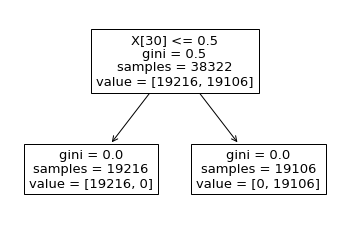

In [6]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)

# See accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


from sklearn import tree
print(tree.export_text(clf))

print(tree.plot_tree(clf))

## https://cnvrg.io/decision-trees-python/

In [7]:
sum(abs(pd.Series([1, 0, 1]) - pd.Series([1, 1, 0])) > 0)

2

25181
2615
Accuracy: 1.0
[Text(167.4, 163.07999999999998, 'X[30] <= 0.5\nmse = 0.25\nsamples = 38322\nvalue = 0.499'), Text(83.7, 54.360000000000014, 'mse = 0.0\nsamples = 19216\nvalue = 0.0'), Text(251.10000000000002, 54.360000000000014, 'mse = 0.0\nsamples = 19106\nvalue = 1.0')]


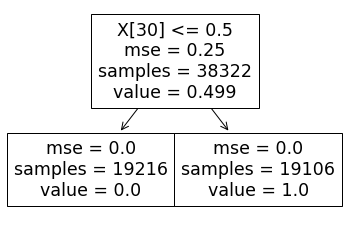

In [8]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(sum(pd.Series(y_pred) - pd.Series(y_test) != 0))
print(sum(pd.Series(y_pred) - pd.Series(y_test) == 0))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(tree.plot_tree(dtr))

[Text(167.4, 163.07999999999998, 'X[30] <= 0.5\ngini = 0.5\nsamples = 38322\nvalue = [19216, 19106]'), Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 19216\nvalue = [19216, 0]'), Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 19106\nvalue = [0, 19106]')]


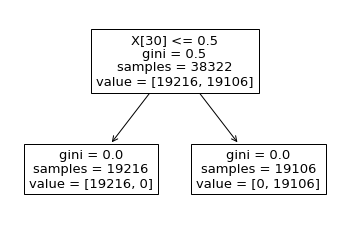

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(tree.plot_tree(dtc))

In [10]:
# Why is the accuracy 100%? 
# X_test["response"] = y_test
# sum(X_test[X_test["response"] == 0].iloc[:,23])

## Neural Network

In [11]:
# Import ANN packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
# Scale the numerical values
# numerical_transform = MinMaxScaler(feature_range=(-1,1))
# numerical_processed = numerical_transform.fit_transform(heart[feature_cols])
heart_scl = deepcopy(heart)
print(heart_scl["BMI"], "\n", min(heart_scl["BMI"]), max(heart_scl["BMI"]))
heart_scl["BMI"] = 2*(heart_scl["BMI"] - min(heart_scl["BMI"]))/max(heart_scl["BMI"]) - 1
heart_scl["PhysicalHealth"] = 2*(heart_scl["PhysicalHealth"] - min(heart_scl["PhysicalHealth"]))/max(heart_scl["PhysicalHealth"]) - 1
heart_scl["MentalHealth"] = 2*(heart_scl["MentalHealth"] - min(heart_scl["MentalHealth"]))/max(heart_scl["MentalHealth"]) - 1
heart_scl["SleepTime"] = 2*(heart_scl["SleepTime"] - min(heart_scl["SleepTime"]))/max(heart_scl["SleepTime"]) - 1
print(heart_scl)
# heart_scl.update(pd.DataFrame(numerical_processed))  # numerical_processed, columns = feature_cols
# Split data
train, test = train_test_split(heart_scl, train_size=0.8, random_state=1)

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64 
 12.02 94.85
        HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0 -0.903426        1                0       0   
1                  0 -0.824565        0                0       1   
2                  0 -0.692989        1                0       0   
3                  0 -0.742963        0                0       0   
4                  0 -0.753506        0                0       0   
...              ...       ...      ...              ...     ...   
319790             1 -0.675488        1                0       0   
319791             0 -0.624249        1                0       0   
319792             0 -0.742330        0                0       0   
319793             0 -0.561624        0                0       0   
319794             0

In [13]:
# Hyperparameter search (grid search)
tf.random.set_seed(100)
def create_model(layer1=40, layer2=25):
    model = keras.Sequential()
    model.add(layers.Dense(layer1, input_shape=(41,)))  # Had to change input shape
    model.add(layers.Activation('sigmoid')) 
    model.add(layers.Dense(layer2))
    model.add(layers.Activation('sigmoid'))
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 
    return model
model = KerasClassifier(build_fn=create_model)
param_grid = {'layer1':[x for x in range(15, 50, 5)], 'layer2':[x for x in range(10, 35, 5)]}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train.drop(columns=['HeartDisease']), train['HeartDisease'])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

274/274 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.5283


KeyboardInterrupt: 

In [ ]:
# Create optimized model
layer1nodes = grid_result.best_params_["layer1"]
layer2nodes = grid_result.best_params_["layer2"]
print("Layer 1: {}\nLayer 2: {}".format(layer1nodes, layer2nodes))

model1a = keras.Sequential([
        keras.Input(shape=(len(train.loc[:,train.columns != 'HeartDisease'].columns))),
        layers.Dense(layer1nodes, activation='sigmoid'),
        layers.Dense(layer2nodes, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
])
mySGD = SGD(lr=0.01, momentum=0.0)
model1a.compile(optimizer=mySGD, loss='mse',
              metrics=["accuracy",
                       keras.metrics.Precision(name="precision",thresholds=0.5),
                       keras.metrics.Recall(name="recall",thresholds=0.5)])

In [ ]:
# Fit that model
weights = {}
result1a = model1a.fit((train.drop("HeartDisease", axis=1)), np.asarray(train["HeartDisease"]).astype('float32'), 
                     epochs=1, batch_size=150, verbose=1)

In [ ]:
# See model
print("Weights: ")
print(model1a.weights)
print("\nLoss: ")
print(model1a.evaluate(test.drop("HeartDisease", axis=1), np.asarray(test["HeartDisease"]).astype('float32')))

The really high recall might be a good thing: overwhelmingly classifies patients as "at risk" to be on the safe side? https://en.wikipedia.org/wiki/Precision_and_recall

## Logistic Regression

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [33]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [34]:
logisticRegr.fit(train.drop("HeartDisease", axis=1), train["HeartDisease"])

/Users/richardge/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
kevin_heartdisease = np.array([[2*(27.3 - min(heart["BMI"]))/max(heart["BMI"]) - 1,1,0,0,2*(3 - min(heart_scl["PhysicalHealth"]))/max(heart["PhysicalHealth"]) - 1,2*(4 - min(heart["MentalHealth"]))/max(heart["MentalHealth"]) - 1,0,1,1,2*(8 - min(heart_scl["SleepTime"]))/max(heart["SleepTime"]) - 1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0]])

i = 4
print(logisticRegr.predict(np.array(train.drop("HeartDisease", axis=1).iloc[i,:]).reshape(1,-1)))
print(logisticRegr.predict_proba(np.array(train.drop("HeartDisease", axis=1).iloc[i,:]).reshape(1,-1)))

print(logisticRegr.predict(kevin_heartdisease.reshape(1,-1)))
print(logisticRegr.predict_proba(kevin_heartdisease.reshape(1,-1)))

[0]
[[0.78600331 0.21399669]]
[0]
[[0.99678813 0.00321187]]


In [37]:
predicted_y = logisticRegr.predict(test.drop("HeartDisease", axis=1))

In [38]:
correct = (sum([x == y for (x, y) in zip(list(predicted_y), list(test["HeartDisease"]))]))
incorrect = (sum([x != y for (x, y) in zip(list(predicted_y), list(test["HeartDisease"]))]))
print(correct / (correct + incorrect))

0.9169155240075674


In [47]:
# Find maxes and mins for frontend implementation
print(min(heart["BMI"]), max(heart["BMI"]))
print(min(heart["PhysicalHealth"]), max(heart["PhysicalHealth"]))
print(min(heart["MentalHealth"]), max(heart["MentalHealth"]))
print(min(heart["SleepTime"]), max(heart["SleepTime"]))

12.02 94.85
0.0 30.0
0.0 30.0
1.0 24.0


## Export Model

https://towardsdatascience.com/why-you-should-switch-to-piskle-for-exporting-your-scikit-learn-models-87028ad83ed

https://stackoverflow.com/questions/65816675/cannot-import-name-delayed-from-sklearn-utils-fixes

https://stackoverflow.com/questions/65152886/save-the-model-using-pickle

https://www.thoughtco.com/using-pickle-to-save-objects-2813661

In [42]:
# Save model
# piskle.dump(logisticRegr, 'LogRegr-Model.pskl')
filehandler = open("LogRegr_pickle.obj", 'wb') 
pickle.dump(logisticRegr, filehandler)

In [43]:
# Load model, under a different name
# model = piskle.load('LogRegr-Model.pskl')
filehandler = open("LogRegr_pickle.obj", 'rb') 
model_ = pickle.load(filehandler)

In [44]:
model_.predict_proba(kevin_heartdisease.reshape(1,-1))
## WORKS!

array([[0.99678813, 0.00321187]])